<a href="https://colab.research.google.com/github/sjrover007/LearningDeep/blob/main/CNNs_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def convolution2D(input_image, kernel):
    input_height, input_width = len(input_image), len(input_image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])

    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1

    # Initialize the output image
    output_image = [[0 for _ in range(output_width)] for _ in range(output_height)]

    # Perform the convolution
    for i in range(output_height):
        for j in range(output_width):
            # Compute the dot product between the kernel and the input region
            dot_product = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    dot_product += input_image[i+m][j+n] * kernel[m][n]
            output_image[i][j] = dot_product

    return output_image

# Define a sample 2D image and a 3x3 kernel
input_image = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]

kernel = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

# Perform convolution
output_image = convolution2D(input_image, kernel)

# Print the result
for row in output_image:
    print(row)

[-6, -6]
[-6, -6]


In [ ]:
import numpy as np
a=np.ones((3,4),dtype=int)
a

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [ ]:
import numpy as np

def convolution2D(input_image, kernel):
    input_height, input_width = input_image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1

    # Initialize the output image
    output_image = np.zeros((output_height, output_width))

    # Perform the convolution
    for i in range(output_height):
        for j in range(output_width):
            output_image[i, j] = np.sum(input_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output_image

def max_pooling2D(input_image, pool_size):
    input_height, input_width = input_image.shape
    pool_height, pool_width = pool_size

    output_height = input_height // pool_height
    output_width = input_width // pool_width

    # Initialize the output image
    output_image = np.zeros((output_height, output_width))

    # Perform max pooling
    for i in range(output_height):
        for j in range(output_width):
            output_image[i, j] = np.max(input_image[i*pool_height:(i+1)*pool_height, j*pool_width:(j+1)*pool_width])

    return output_image

# Sample input image
input_image = np.array([[1, 2, 1, 0],
                        [0, 1, 3, 2],
                        [2, 0, 1, 2],
                        [1, 2, 2, 1]])

# Sample kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# Sample max pooling size
pool_size = (2, 2)

# Perform convolution
conv_output = convolution2D(input_image, kernel)

# Perform max pooling
pool_output = max_pooling2D(conv_output, pool_size)

# Print the results
print("Convolution output:")
print(conv_output)

print("\nMax pooling output:")
print(pool_output)

Convolution output:
[[-2. -1.]
 [-3. -2.]]

Max pooling output:
[[-1.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


**MaxPooling 2D**

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 42s 54ms/step - loss: 0.2330 - accuracy: 0.9324 - val_loss: 0.0956 - val_accuracy: 0.9721
Epoch 2/5
750/750 [==============================] - 21s 28ms/step - loss: 0.0716 - accuracy: 0.9785 - val_loss: 0.0767 - val_accuracy: 0.9768
Epoch 3/5
750/750 [==============================] - 24s 32ms/step - loss: 0.0501 - accuracy: 0.9849 - val_loss: 0.0577 - val_accuracy: 0.9832
Epoch 4/5
750/750 [==============================] - 22s 30ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0553 - val_accuracy: 0.9843
Epoch 5/5
750/750 [==============================] - 23s 31ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0587 - val_accuracy: 0.9837


313/313 [==============================] - 3s 8ms/step - loss: 0.0562 - accuracy: 0.9818
Test accuracy: 0.9818000197410583
1/1 [==============================] - 0s 99ms/step


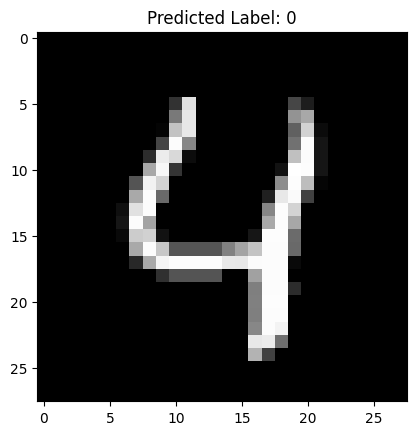

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Prediction on a single test image
sample_image = test_images[3].reshape((1, 28, 28, 1))
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

# Display the sample image and its predicted label
plt.imshow(test_images[4].reshape((28, 28)), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()